In [2]:
from scipy.io import netcdf
import numpy as np
from pylab import clf, plot, show, floor, ceil, imshow
import matplotlib
import matplotlib.pyplot as plt 
from netCDF4 import Dataset
%matplotlib inline
#xlabel, ylabel, legend, savefig, colorbar, title, clim, pcolor, cm, contourf
import os
import csv
import sys
import glob
from IPython.display import display, Math, Latex, Image
from mpl_toolkits.basemap import Basemap
sys.path.append('/noc/users/am8e13/PyNGL-1.4.0/lib/python2.7/site-packages/PyNGL/')
import Ngl
sys.path.append('/noc/users/am8e13/Python/')
import komod
#sys.path.append('/noc/users/am8e13/Python/PyNIO-1.4.0/')
import Nio

Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 30 days


In [10]:
class ObcsData():
    def __init__(self):
        self.data = {'Ev' : [] , 'Wv' : [] , 'Nv' : [] , \
                     'Eu' : [] , 'Wu' : [] , 'Nu' : [] , \
                     'Et' : [] , 'Wt' : [] , 'Nt' : [] , \
                     'Es' : [] , 'Ws' : [] , 'Ns' : [] }
        self.data_av = {'Ev' : [] , 'Wv' : [] , 'Nv' : [] , \
                     'Eu' : [] , 'Wu' : [] , 'Nu' : [] , \
                     'Et' : [] , 'Wt' : [] , 'Nt' : [] , \
                     'Es' : [] , 'Ws' : [] , 'Ns' : [] }
    def ReadData(self,path,tdim,endingstr,res):
        obcs_data = ['Ev' , 'Wv' , 'Nv' , 'Eu' , 'Wu' , 'Nu' , 'Et' , 'Wt' , 'Nt' , 'Es' , 'Ws' , 'Ns' ]
        
        if res == 18:
            xdim = [420,1]
            ydim = [384,1]
            file_res = "_arctic_420x384."
        elif res == 36:
            xdim = [210,1]
            ydim = [192,1]
            file_res = "_arctic_210x192."
        elif res == 9:
            xdim = [840,1]
            ydim = [768,1]
            file_res = "_arctic_840x768."
        zdim = 50
        
        for var in obcs_data:
            if var == 'Nu' or var == 'Nv' or var == 'Ns' or var == 'Nt':
                xdim_i = 0
                ydim_i = 1
            elif var == 'Wu' or var == 'Wv' or var == 'Ws' or var == 'Wt' or \
                    var == 'Eu' or var == 'Ev' or var == 'Es' or var == 'Et':
                xdim_i = 1
                ydim_i = 0
            
            if var == 'Es' or var == 'Ns' or var == 'Ws':
                stable = 'stable'
                ending = ''
            elif var == 'Et' or var == 'Nt' or var == 'Wt':
                stable = 'stable'
                ending = endingstr
            else:
                stable = 'bin'
                ending = ''
                
            name = path+'/OB'+str(var)+file_res+str(stable)+'_mean'+str(ending)
            data = komod.mitbin(name,xdim=xdim[xdim_i],ydim=ydim[ydim_i],zdim=50,tdim=tdim,datatype='float32')
            data_av_temp = np.mean(np.mean(np.mean(data,axis=3),axis=2),1)    
            self.data[var] = data #_av_temp
            #self.data_av[var] = data_av_temp
            data_climy_33_years = []
            for year in range(10):
                data_climy_33_years = np.concatenate([data_climy_33_years, data_av_temp])
            self.data_av[var] = data_climy_33_years 
    
obcs_tempcorr = ObcsData()
obcs_tempcorr.ReadData('/scratch/general/am8e13/cs_36km_tutorial/OB1992_2010_c81_36km/',12,'_tempmod',36)
obcs_tempcorr1 = ObcsData()
obcs_tempcorr1.ReadData('/scratch/general/am8e13/cs_36km_tutorial/OB1992_2010_c81_36km/',12,'_tempmod1',36)
obcs_tempcorr2 = ObcsData()
obcs_tempcorr2.ReadData('/scratch/general/am8e13/cs_36km_tutorial/OB1992_2010_c81_36km/',12,'_tempmod2',36)
obcs_tempcorr3 = ObcsData()
obcs_tempcorr3.ReadData('/scratch/general/am8e13/cs_36km_tutorial/OB1992_2010_c81_36km/',12,'_tempmod3',36)
obcs_tempcorr4 = ObcsData()
obcs_tempcorr4.ReadData('/scratch/general/am8e13/cs_36km_tutorial/OB1992_2010_c81_36km/',12,'_tempmod4',36)
obcs_nocorr = ObcsData()
obcs_nocorr.ReadData('/scratch/general/am8e13/cs_36km_tutorial/OB1992_2010_c81_36km/',12,'',36)
obcs_nocorr_18 = ObcsData()
obcs_nocorr_18.ReadData('/scratch/general/am8e13/arctic420x384/obcs_average/',12,'',18)
obcs_tempcorr1_18km = ObcsData()
obcs_tempcorr1_18km.ReadData('/scratch/general/am8e13/arctic420x384/obcs_average/',12,'_tempmod1',18)

obcs_9km = ObcsData()
obcs_9km.ReadData('/scratch/general/am8e13/obcs_9km/',12,'',9)
obcs_9km_tempcorr1 = ObcsData()
obcs_9km_tempcorr1.ReadData('/scratch/general/am8e13/obcs_9km/',12,'_tempmod1',9)

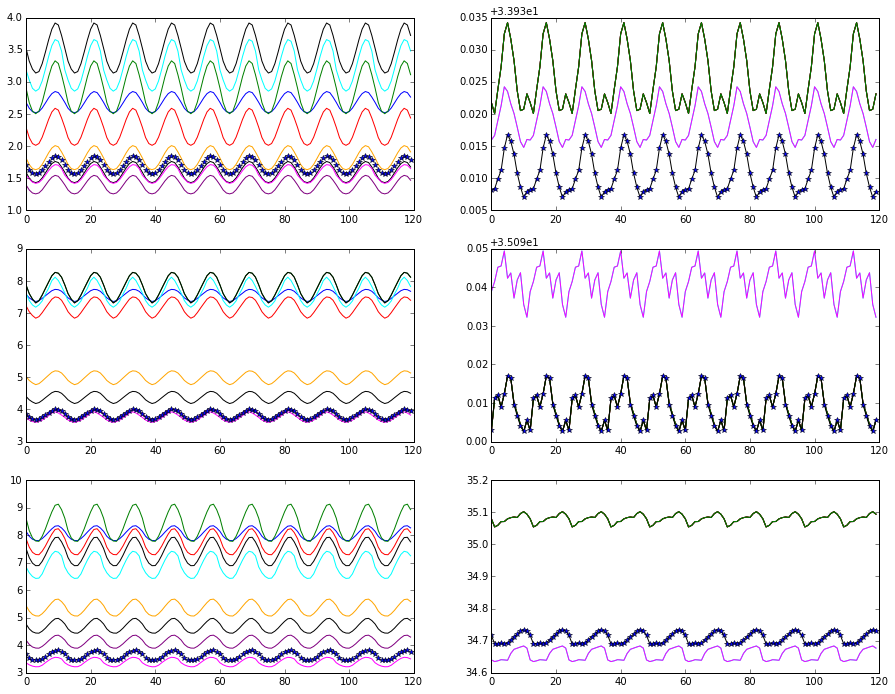

In [11]:
fig, axes = plt.subplots(3,2)
ax_ind = 0
ord_var = ['Et','Es','Wt','Ws','Nt','Ns']
#time = np.array(range(len(obcs_data['Eu'])))
for var in ord_var:
    axes.flat[ax_ind].plot(obcs_tempcorr.data_av[var],'b')
    axes.flat[ax_ind].plot(obcs_tempcorr1.data_av[var],'r')
    axes.flat[ax_ind].plot(obcs_tempcorr2.data_av[var],'purple')
    axes.flat[ax_ind].plot(obcs_tempcorr3.data_av[var],'orange')
    axes.flat[ax_ind].plot(obcs_tempcorr4.data_av[var],'black')
    axes.flat[ax_ind].plot(obcs_nocorr.data_av[var],'g')
    axes.flat[ax_ind].plot(obcs_nocorr_18.data_av[var],'cyan')
    axes.flat[ax_ind].plot(obcs_tempcorr1_18km.data_av[var],'magenta')
    axes.flat[ax_ind].plot(obcs_9km.data_av[var],'black')
    axes.flat[ax_ind].plot(obcs_9km_tempcorr1.data_av[var],'b*')
#    axes.flat[ax_ind].set_title(titles_obcs[var])
#    axes.flat[ax_ind].set_ylabel(unity_obcs[var])
    ax_ind +=  1
fig.subplots_adjust(right=2.1,top=2.4)

In [50]:
# Load adata files
xdim = [210,1]
ydim = [192,1]
zdim = 50
tdim = 12

obcs_data = {'Ev': np.zeros(12*33) , 'Wv' : np.zeros(12*33), 'Nv': np.zeros(12*33), \
            'Eu' : np.zeros(12*33) , 'Wu' : np.zeros(12*33) , 'Nu' : np.zeros(12*33), \
            'Et': np.zeros(12*33) , 'Wt' : np.zeros(12*33), 'Nt': np.zeros(12*33), \
            'Es' : np.zeros(12*33) , 'Ws' : np.zeros(12*33) , 'Ns' : np.zeros(12*33) }
obcs_data_mean = {'Ev': np.zeros(12*33) , 'Wv' : np.zeros(12*33), 'Nv': np.zeros(12*33), \
            'Eu' : np.zeros(12*33) , 'Wu' : np.zeros(12*33) , 'Nu' : np.zeros(12*33), \
            'Et': np.zeros(12*33) , 'Wt' : np.zeros(12*33), 'Nt': np.zeros(12*33), \
            'Es' : np.zeros(12*33) , 'Ws' : np.zeros(12*33) , 'Ns' : np.zeros(12*33) }
obcs_data_ave_mean = {'Ev': np.zeros(12*33) , 'Wv' : np.zeros(12*33), 'Nv': np.zeros(12*33), \
            'Eu' : np.zeros(12*33) , 'Wu' : np.zeros(12*33) , 'Nu' : np.zeros(12*33), \
            'Et': np.zeros(12*33) , 'Wt' : np.zeros(12*33), 'Nt': np.zeros(12*33), \
            'Es' : np.zeros(12*33) , 'Ws' : np.zeros(12*33) , 'Ns' : np.zeros(12*33) }

obcs_data_ave = {'Ev': np.zeros(12*33) , 'Wv' : np.zeros(12*33), 'Nv': np.zeros(12*33), \
            'Eu' : np.zeros(12*33) , 'Wu' : np.zeros(12*33) , 'Nu' : np.zeros(12*33), \
            'Et': np.zeros(12*33) , 'Wt' : np.zeros(12*33), 'Nt': np.zeros(12*33), \
            'Es' : np.zeros(12*33) , 'Ws' : np.zeros(12*33) , 'Ns' : np.zeros(12*33) }

obcs_data_new = {'Ev': np.zeros(12*33) , 'Wv' : np.zeros(12*33), 'Nv': np.zeros(12*33), \
            'Eu' : np.zeros(12*33) , 'Wu' : np.zeros(12*33) , 'Nu' : np.zeros(12*33), \
            'Et': np.zeros(12*33) , 'Wt' : np.zeros(12*33), 'Nt': np.zeros(12*33), \
            'Es' : np.zeros(12*33) , 'Ws' : np.zeros(12*33) , 'Ns' : np.zeros(12*33) }
obcs_data_mean_new = {'Ev': np.zeros(12*33) , 'Wv' : np.zeros(12*33), 'Nv': np.zeros(12*33), \
            'Eu' : np.zeros(12*33) , 'Wu' : np.zeros(12*33) , 'Nu' : np.zeros(12*33), \
            'Et': np.zeros(12*33) , 'Wt' : np.zeros(12*33), 'Nt': np.zeros(12*33), \
            'Es' : np.zeros(12*33) , 'Ws' : np.zeros(12*33) , 'Ns' : np.zeros(12*33) }
obcs_data_ave_mean_new = {'Ev': np.zeros(12*33) , 'Wv' : np.zeros(12*33), 'Nv': np.zeros(12*33), \
            'Eu' : np.zeros(12*33) , 'Wu' : np.zeros(12*33) , 'Nu' : np.zeros(12*33), \
            'Et': np.zeros(12*33) , 'Wt' : np.zeros(12*33), 'Nt': np.zeros(12*33), \
            'Es' : np.zeros(12*33) , 'Ws' : np.zeros(12*33) , 'Ns' : np.zeros(12*33) }

obcs_data_ave_new = {'Ev': np.zeros(12*33) , 'Wv' : np.zeros(12*33), 'Nv': np.zeros(12*33), \
            'Eu' : np.zeros(12*33) , 'Wu' : np.zeros(12*33) , 'Nu' : np.zeros(12*33), \
            'Et': np.zeros(12*33) , 'Wt' : np.zeros(12*33), 'Nt': np.zeros(12*33), \
            'Es' : np.zeros(12*33) , 'Ws' : np.zeros(12*33) , 'Ns' : np.zeros(12*33) }


obcs_data_ave_mean = {'Ev': np.zeros(12*33) , 'Wv' : np.zeros(12*33), 'Nv': np.zeros(12*33), \
            'Eu' : np.zeros(12*33) , 'Wu' : np.zeros(12*33) , 'Nu' : np.zeros(12*33), \
            'Et': np.zeros(12*33) , 'Wt' : np.zeros(12*33), 'Nt': np.zeros(12*33), \
            'Es' : np.zeros(12*33) , 'Ws' : np.zeros(12*33) , 'Ns' : np.zeros(12*33) }

obcs_data_ave_div = {'Ev': np.zeros(12*33) , 'Wv' : np.zeros(12*33), 'Nv': np.zeros(12*33), \
            'Eu' : np.zeros(12*33) , 'Wu' : np.zeros(12*33) , 'Nu' : np.zeros(12*33), \
            'Et': np.zeros(12*33) , 'Wt' : np.zeros(12*33), 'Nt': np.zeros(12*33), \
            'Es' : np.zeros(12*33) , 'Ws' : np.zeros(12*33) , 'Ns' : np.zeros(12*33) }

obcs_data_ave_mean_div = {'Ev': np.zeros(12*33) , 'Wv' : np.zeros(12*33), 'Nv': np.zeros(12*33), \
            'Eu' : np.zeros(12*33) , 'Wu' : np.zeros(12*33) , 'Nu' : np.zeros(12*33), \
            'Et': np.zeros(12*33) , 'Wt' : np.zeros(12*33), 'Nt': np.zeros(12*33), \
            'Es' : np.zeros(12*33) , 'Ws' : np.zeros(12*33) , 'Ns' : np.zeros(12*33) }

for var in obcs_data:
    data_av = []
    print "Now reading:"+str(var)
    if var == 'Nu' or var == 'Nv' or var == 'Ns' or var == 'Nt':
        xdim_i = 0
        ydim_i = 1
    elif var == 'Wu' or var == 'Wv' or var == 'Ws' or var == 'Wt' or \
         var == 'Eu' or var == 'Ev' or var == 'Es' or var == 'Et':
        xdim_i = 1
        ydim_i = 0
            
    if var == 'Es' or var == 'Et' or var == 'Ns' or var == 'Nt' or var == 'Ws' or var == 'Wt':
        stable = 'stable'
        ending = '_climyaverage'
    else:
        stable = 'bin'
        ending = '_zeroed'
        
    name = '/scratch/general/am8e13/cs_36km_tutorial/input_obcs/OB'+str(var)+'_arctic_210x192.'+str(stable)
    data = komod.mitbin(name,xdim=xdim[xdim_i],ydim=ydim[ydim_i],zdim=50,tdim=tdim*10,datatype='float32')
    data_av_temp = np.mean(np.mean(np.mean(data,axis=3),axis=2),1)    
    obcs_data[var] = data #_av_temp
    obcs_data_mean[var] = data_av_temp    
    
    name = '/scratch/general/am8e13/cs_36km_tutorial/OB1992_2010_c81_36km/OB'+str(var)+'_arctic_210x192.'+str(stable)
    data = komod.mitbin(name,xdim=xdim[xdim_i],ydim=ydim[ydim_i],zdim=50,tdim=tdim*10,datatype='float32')
    data_av_temp = np.mean(np.mean(np.mean(data,axis=3),axis=2),1)    
    obcs_data_new[var] = data #_av_temp
    obcs_data_mean_new[var] = data_av_temp
    
    name = '/scratch/general/am8e13/cs_36km_tutorial/input_obcs/OB'+str(var)+'_arctic_210x192.'+str(stable)+\
    '_climyaverage'
    data = komod.mitbin(name,xdim=xdim[xdim_i],ydim=ydim[ydim_i],zdim=50,tdim=tdim,datatype='float32')
    data_climy_av = np.mean(np.mean(np.mean(data,axis=3),axis=2),1)
    data_climy_33_years = []
    
    for year in range(10):
        data_climy_33_years = np.concatenate([data_climy_33_years, data_climy_av])
    obcs_data_ave_mean[var] = data_climy_33_years    
    obcs_data_ave[var] = data#_climy_33_years
    
    if var == 'Es' or var == 'Et' or var == 'Ns' or var == 'Nt' or var == 'Ws' or var == 'Wt':
        name = '/scratch/general/am8e13/cs_36km_tutorial/input_obcs/OB'+str(var)+'_arctic_210x192.'\
        +str(stable)+'_climyaverage'
    else:
        name = '/scratch/general/am8e13/cs_36km_tutorial/input_obcs/OB'+str(var)+'_arctic_210x192.'\
        +str(stable)+'_zeroed_div'
    data = komod.mitbin(name,xdim=xdim[xdim_i],ydim=ydim[ydim_i],zdim=50,tdim=tdim,datatype='float32')
    data_climy_av = np.mean(np.mean(np.mean(data,axis=3),axis=2),1)
    data_climy_33_years = []
    
    for year in range(10):
        data_climy_33_years = np.concatenate([data_climy_33_years, data_climy_av])
    obcs_data_ave_mean_div[var] = data_climy_33_years    
    obcs_data_ave_div[var] = data#_climy_33_years
    

    name = '/scratch/general/am8e13/cs_36km_tutorial/OB1992_2010_c81_36km/OB'+str(var)+'_arctic_210x192.'\
        +str(stable)
    data = komod.mitbin(name,xdim=xdim[xdim_i],ydim=ydim[ydim_i],zdim=50,tdim=tdim,datatype='float32')
    data_climy_av = np.mean(np.mean(np.mean(data,axis=3),axis=2),1)
    data_climy_33_years = []
    
    for year in range(10):
        data_climy_33_years = np.concatenate([data_climy_33_years, data_climy_av])
    obcs_data_ave_mean_new[var] = data_climy_33_years    
    #obcs_data_mean_new[var] = data#_climy_33_years


Now reading:Ns
Now reading:Nt
Now reading:Nu
Now reading:Nv
Now reading:Wv
Now reading:Wu
Now reading:Wt
Now reading:Ws
Now reading:Eu
Now reading:Et
Now reading:Ev
Now reading:Es


In [4]:
# Load adata files
xdim = [420,1]
ydim = [384,1]
zdim = 50
tdim = 12

obcs_data_18 = {'Ev': np.zeros(12*33) , 'Wv' : np.zeros(12*33), 'Nv': np.zeros(12*33), \
            'Eu' : np.zeros(12*33) , 'Wu' : np.zeros(12*33) , 'Nu' : np.zeros(12*33), \
            'Et': np.zeros(12*33) , 'Wt' : np.zeros(12*33), 'Nt': np.zeros(12*33), \
            'Es' : np.zeros(12*33) , 'Ws' : np.zeros(12*33) , 'Ns' : np.zeros(12*33) }

obcs_data_mean_18 = {'Ev': np.zeros(12*33) , 'Wv' : np.zeros(12*33), 'Nv': np.zeros(12*33), \
            'Eu' : np.zeros(12*33) , 'Wu' : np.zeros(12*33) , 'Nu' : np.zeros(12*33), \
            'Et': np.zeros(12*33) , 'Wt' : np.zeros(12*33), 'Nt': np.zeros(12*33), \
            'Es' : np.zeros(12*33) , 'Ws' : np.zeros(12*33) , 'Ns' : np.zeros(12*33) }

obcs_data_ave_18 = {'Ev': np.zeros(12*33) , 'Wv' : np.zeros(12*33), 'Nv': np.zeros(12*33), \
            'Eu' : np.zeros(12*33) , 'Wu' : np.zeros(12*33) , 'Nu' : np.zeros(12*33), \
            'Et': np.zeros(12*33) , 'Wt' : np.zeros(12*33), 'Nt': np.zeros(12*33), \
            'Es' : np.zeros(12*33) , 'Ws' : np.zeros(12*33) , 'Ns' : np.zeros(12*33) }

obcs_data_ave_mean_18 = {'Ev': np.zeros(12*33) , 'Wv' : np.zeros(12*33), 'Nv': np.zeros(12*33), \
            'Eu' : np.zeros(12*33) , 'Wu' : np.zeros(12*33) , 'Nu' : np.zeros(12*33), \
            'Et': np.zeros(12*33) , 'Wt' : np.zeros(12*33), 'Nt': np.zeros(12*33), \
            'Es' : np.zeros(12*33) , 'Ws' : np.zeros(12*33) , 'Ns' : np.zeros(12*33) }

for var in obcs_data:
    data_av = []
    print "Now reading:"+str(var)
    if var == 'Nu' or var == 'Nv' or var == 'Ns' or var == 'Nt':
        xdim_i = 0
        ydim_i = 1
    elif var == 'Wu' or var == 'Wv' or var == 'Ws' or var == 'Wt' or \
         var == 'Eu' or var == 'Ev' or var == 'Es' or var == 'Et':
        xdim_i = 1
        ydim_i = 0
            
    if var == 'Es' or var == 'Et' or var == 'Ns' or var == 'Nt' or var == 'Ws' or var == 'Wt':
        stable = 'stable'
        ending = '_climyaverage'
    else:
        stable = 'bin'
        ending = '_zeroed'
        
    name = '/scratch/general/am8e13/arctic420x384/obcscopy/OB'+str(var)+'_arctic_420x384.'+str(stable)
    data = komod.mitbin(name,xdim=xdim[xdim_i],ydim=ydim[ydim_i],zdim=50,tdim=tdim*10,datatype='float32')
    data_av_temp = np.mean(np.mean(np.mean(data,axis=3),axis=2),1)    
    obcs_data_18[var] = data #_av_temp
    obcs_data_mean_18[var] = data_av_temp
    
    name = '/scratch/general/am8e13/arctic420x384/obcscopy/OB'+str(var)+'_arctic_420x384.'+str(stable)+'_climyaverage'
    data = komod.mitbin(name,xdim=xdim[xdim_i],ydim=ydim[ydim_i],zdim=50,tdim=tdim,datatype='float32')
    data_climy_av = np.mean(np.mean(np.mean(data,axis=3),axis=2),1)
    data_climy_33_years = []
    
    for year in range(10):
        data_climy_33_years = np.concatenate([data_climy_33_years, data_climy_av])
    obcs_data_ave_mean_18[var] = data_climy_33_years    
    obcs_data_ave_18[var] = data#_climy_33_years

Now reading:Ns
Now reading:Nt
Now reading:Nu
Now reading:Nv
Now reading:Wv
Now reading:Wu
Now reading:Wt
Now reading:Ws
Now reading:Eu
Now reading:Et
Now reading:Ev
Now reading:Es


In [60]:
# Load adata files
xdim = [420,1]
ydim = [384,1]
zdim = 50
tdim = 12

obcs_data_18_new = {'Ev': np.zeros(12*33) , 'Wv' : np.zeros(12*33), 'Nv': np.zeros(12*33), \
            'Eu' : np.zeros(12*33) , 'Wu' : np.zeros(12*33) , 'Nu' : np.zeros(12*33), \
            'Et': np.zeros(12*33) , 'Wt' : np.zeros(12*33), 'Nt': np.zeros(12*33), \
            'Es' : np.zeros(12*33) , 'Ws' : np.zeros(12*33) , 'Ns' : np.zeros(12*33) }

obcs_data_mean_18_new = {'Ev': np.zeros(12*33) , 'Wv' : np.zeros(12*33), 'Nv': np.zeros(12*33), \
            'Eu' : np.zeros(12*33) , 'Wu' : np.zeros(12*33) , 'Nu' : np.zeros(12*33), \
            'Et': np.zeros(12*33) , 'Wt' : np.zeros(12*33), 'Nt': np.zeros(12*33), \
            'Es' : np.zeros(12*33) , 'Ws' : np.zeros(12*33) , 'Ns' : np.zeros(12*33) }

obcs_data_ave_18_new = {'Ev': np.zeros(12*33) , 'Wv' : np.zeros(12*33), 'Nv': np.zeros(12*33), \
            'Eu' : np.zeros(12*33) , 'Wu' : np.zeros(12*33) , 'Nu' : np.zeros(12*33), \
            'Et': np.zeros(12*33) , 'Wt' : np.zeros(12*33), 'Nt': np.zeros(12*33), \
            'Es' : np.zeros(12*33) , 'Ws' : np.zeros(12*33) , 'Ns' : np.zeros(12*33) }

obcs_data_ave_mean_18_new = {'Ev': np.zeros(12*33) , 'Wv' : np.zeros(12*33), 'Nv': np.zeros(12*33), \
            'Eu' : np.zeros(12*33) , 'Wu' : np.zeros(12*33) , 'Nu' : np.zeros(12*33), \
            'Et': np.zeros(12*33) , 'Wt' : np.zeros(12*33), 'Nt': np.zeros(12*33), \
            'Es' : np.zeros(12*33) , 'Ws' : np.zeros(12*33) , 'Ns' : np.zeros(12*33) }

for var in obcs_data:
    data_av = []
    print "Now reading:"+str(var)
    if var == 'Nu' or var == 'Nv' or var == 'Ns' or var == 'Nt':
        xdim_i = 0
        ydim_i = 1
    elif var == 'Wu' or var == 'Wv' or var == 'Ws' or var == 'Wt' or \
         var == 'Eu' or var == 'Ev' or var == 'Es' or var == 'Et':
        xdim_i = 1
        ydim_i = 0
            
    if var == 'Es' or var == 'Et' or var == 'Ns' or var == 'Nt' or var == 'Ws' or var == 'Wt':
        stable = 'stable'
        ending = '_climyaverage'
    else:
        stable = 'bin'
        ending = '_zeroed'
        
    name = '/scratch/general/am8e13/matlab_obcs/+OB1979_2019/OB'+str(var)+'_arctic_420x384_19792019.'+str(stable)
    data = komod.mitbin(name,xdim=xdim[xdim_i],ydim=ydim[ydim_i],zdim=50,tdim=tdim*10,datatype='float32')
    data_av_temp = np.mean(np.mean(np.mean(data,axis=3),axis=2),1)    
    obcs_data_18_new[var] = data #_av_temp
    obcs_data_mean_18_new[var] = data_av_temp
    
    #name = '/scratch/general/am8e13/arctic420x384/obcscopy/OB'+str(var)+'_arctic_420x384.'+str(stable)+'_climyaverage'
    #data = komod.mitbin(name,xdim=xdim[xdim_i],ydim=ydim[ydim_i],zdim=50,tdim=tdim,datatype='float32')
    #data_climy_av = np.mean(np.mean(np.mean(data,axis=3),axis=2),1)
    #data_climy_33_years = []
    
    #for year in range(10):
    #    data_climy_33_years = np.concatenate([data_climy_33_years, data_climy_av])
    #obcs_data_ave_mean_18[var] = data_climy_33_years    
    #obcs_data_ave_18[var] = data#_climy_33_years

Now reading:Ns
Now reading:Nt
Now reading:Nu
Now reading:Nv
Now reading:Wv
Now reading:Wu
Now reading:Wt
Now reading:Ws
Now reading:Eu
Now reading:Et
Now reading:Ev
Now reading:Es


In [39]:
titles_obcs = {'Ev': 'East V' , 'Wv' : 'West V', 'Nv': 'North V', 'Eu' : 'East U' , 'Wu' : 'West U' ,\
               'Nu' : 'North U', 'Et': 'East t' , 'Wt' : 'West T' , 'Nt': 'North T' , 'Es' : 'East S' ,\
               'Ws' : 'West S' , 'Ns' : 'North S' }

unity_obcs = {'Ev': 'm/s' , 'Wv' : 'm/s', 'Nv': 'm/s', 'Eu' : 'm/s' , 'Wu' : 'm/s' , 'Nu' : 'm/s', \
              'Et': 'C' , 'Wt' : 'C' , 'Nt': 'C' , 'Es' : 'psu' , 'Ws' : 'psu' , 'Ns' : 'psu' }

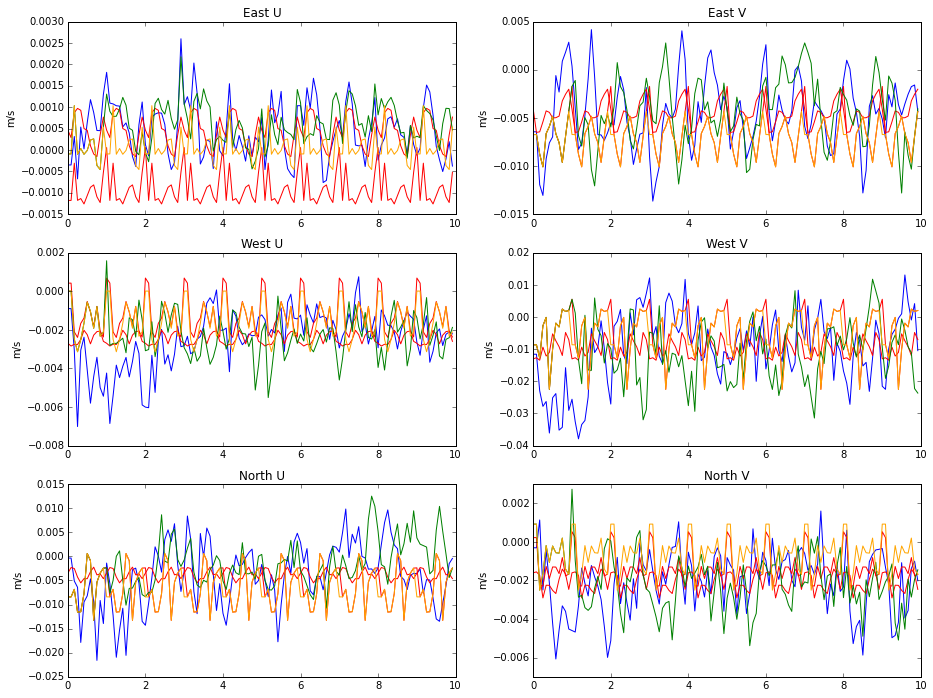

In [61]:
fig, axes = plt.subplots(3,2)
yp =50
ax_ind = 0
ord_var = ['Eu','Ev','Wu','Wv','Nu','Nv']
time = np.array(range(len(obcs_data['Eu'])))
for var in ord_var:
    axes.flat[ax_ind].plot(time[0:12*yp]/12.,obcs_data_mean[var][0:12*yp],'b')
    axes.flat[ax_ind].plot(time[0:12*yp]/12.,obcs_data_ave_mean[var][0:12*yp],'r')
    axes.flat[ax_ind].plot(time[0:12*yp]/12.,obcs_data_mean_18_new[var][0:12*yp],'r')
    #axes.flat[ax_ind].plot(time[0:12*yp]/12.,obcs_data_mean_18[var][0:12*yp],'purple')
    #axes.flat[ax_ind].plot(time[0:12*yp]/12.,obcs_data_ave_mean_div[var][0:12*yp],'orange')
    #axes.flat[ax_ind].plot(time[0:12*yp]/12.,obcs_data_ave_mean_18[var][0:12*yp],'g')
    axes.flat[ax_ind].plot(time[0:12*yp]/12.,obcs_data_mean_new[var][0:12*yp],'g')
    axes.flat[ax_ind].plot(time[0:12*yp]/12.,obcs_data_ave_mean_new[var][0:12*yp],'orange')
    axes.flat[ax_ind].set_title(titles_obcs[var])
    axes.flat[ax_ind].set_ylabel(unity_obcs[var])
    ax_ind +=  1
    yp = 50
fig.subplots_adjust(right=2.1,top=2.4)

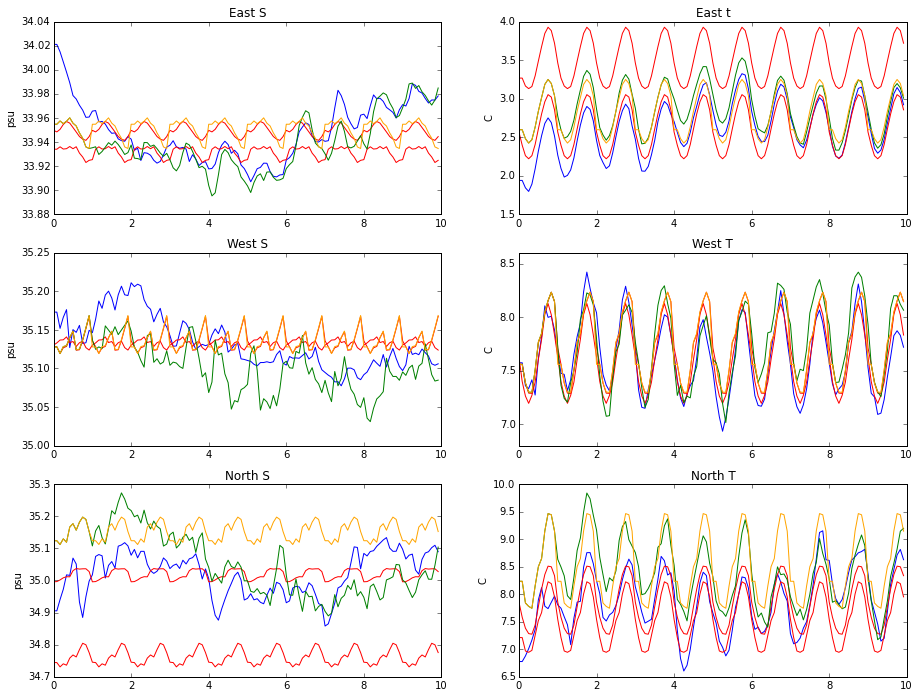

In [62]:
fig, axes = plt.subplots(3,2)
yp =100
ax_ind = 0
ord_var = ['Es','Et','Ws','Wt','Ns','Nt']
time = np.array(range(len(obcs_data['Eu'])))
for var in ord_var:
    axes.flat[ax_ind].plot(time[0:12*yp]/12.,obcs_data_mean[var][0:12*yp],'b')
    axes.flat[ax_ind].plot(time[0:12*yp]/12.,obcs_data_ave_mean[var][0:12*yp],'r')
    axes.flat[ax_ind].plot(time[0:12*yp]/12.,obcs_data_mean_18_new[var][0:12*yp],'r')
    #axes.flat[ax_ind].plot(time[0:12*yp]/12.,obcs_data_mean_18[var][0:12*yp],'g')
    #axes.flat[ax_ind].plot(time[0:12*yp]/12.,obcs_data_ave_mean_18[var][0:12*yp],'purple')
    axes.flat[ax_ind].plot(time[0:12*yp]/12.,obcs_data_mean_new[var][0:12*yp],'g')
    axes.flat[ax_ind].plot(time[0:12*yp]/12.,obcs_data_ave_mean_new[var][0:12*yp],'orange')
    axes.flat[ax_ind].set_title(titles_obcs[var])
    axes.flat[ax_ind].set_ylabel(unity_obcs[var])
    ax_ind +=  1
    yp = 100
fig.subplots_adjust(right=2.1,top=2.4)

In [8]:
def volume_calc(res):
    if res == 36:
        x="/scratch/general/am8e13/results36km"
    elif res == 18:
        x="/scratch/general/am8e13/results18km"
    
    os.chdir(x)
    file2read = netcdf.NetCDFFile("grid.nc",'r')
    hfacw = file2read.variables['HFacW']
    hfacw = hfacw[:]*1
    dyG = file2read.variables['dyG']
    dyG = dyG[:]*1   
    dxG = file2read.variables['dxG']
    dxG = dxG[:]*1  
    
    hfacs = file2read.variables['HFacS']
    hfacs = hfacs[:]*1
    dyU = file2read.variables['dyU']
    dyU = dyU[:]*1
    dxV = file2read.variables['dxV']
    dxV = dxV[:]*1    
    drf = file2read.variables['drF']
    drf = drf[:]*1
    
    # uFlux = uVel(i,j,k,bi,bj)*hFacW(i,j,k,bi,bj)*dyG(i,j,bi,bj)*drF(k)
    # vFlux = vVel(i,j,k,bi,bj)*hFacS(i,j,k,bi,bj)*dyG(i,j,bi,bj)*drF(k)
    
    # Volume calculation  
    dydz_u = np.zeros_like(hfacw)                                                                                             
    for i in range(dyG.shape[0]-1):
        for j in range(dyG.shape[1]):
            for k in range(drf.shape[0]):
                dydz_u[k,i,j] = drf[k]*dyG[i,j]*hfacw[k,i,j]
    
    dydz_v = np.zeros_like(hfacs)                                                                                             
    for i in range(dyG.shape[0]):
        for j in range(dyG.shape[1]-1):
            for k in range(drf.shape[0]):
                dydz_v[k,i,j] = drf[k]*dyG[i,j]*hfacs[k,i,j]  
                
    dxdz_u = np.zeros_like(hfacw)                                                                                             
    for i in range(dxG.shape[0]-1):
        for j in range(dxG.shape[1]):
            for k in range(drf.shape[0]):
                dxdz_u[k,i,j] = drf[k]*dxG[i,j]*hfacw[k,i,j]
                
    dxdz_v = np.zeros_like(hfacs)                                                                                             
    for i in range(dxV.shape[0]):
        for j in range(dxV.shape[1]-1):
            for k in range(drf.shape[0]):
                dxdz_v[k,i,j] = drf[k]*dxG[i,j]*hfacs[k,i,j]
    
    return dydz_u, dydz_v, dxdz_u, dxdz_v

dydz_u_18, dydz_v_18, dxdz_u_18, dxdz_v_18 = volume_calc(18)
dydz_u_36, dydz_v_36, dxdz_u_36, dxdz_v_36 = volume_calc(36)

def volume_selection(res):
    if res == 18:
        dydz_u = dydz_u_18 
        dydz_v = dydz_v_18
        dxdz_u = dxdz_u_18
        dxdz_v = dxdz_v_18
    elif res == 36:
        dydz_u = dydz_u_36 
        dydz_v = dydz_v_36
        dxdz_u = dxdz_u_36
        dxdz_v = dxdz_v_36    
    
    return dydz_u, dydz_v, dxdz_u, dxdz_v

In [9]:
def calculate_fluxes_ob(dic_data,res):
    
    dydz_u, dydz_v, dxdz_u, dxdz_v = volume_selection(res)
    
    if res == 18:
        nx = 420
        ny = 384
    elif res == 36:
        nx = 210
        ny = 192

    Wv_flux = np.zeros(dic_data['Wv'].shape[0])
    Wu_flux = np.zeros(dic_data['Wv'].shape[0])
    Ev_flux = np.zeros(dic_data['Wv'].shape[0])
    Eu_flux = np.zeros(dic_data['Wv'].shape[0])
    Nv_flux = np.zeros(dic_data['Wv'].shape[0])
    Nu_flux = np.zeros(dic_data['Wv'].shape[0])
    
    for t in range(dic_data['Wv'].shape[0]):
        Wv_flux[t] = np.mean(np.sum(dic_data['Wv'][t,:,:]*dydz_v[:,0:ny,1])) ;
        Wu_flux[t] = np.mean(np.sum(dic_data['Wu'][t,:,:]*dydz_u[:,0:ny,1])) ;
        Ev_flux[t] = np.mean(np.sum(dic_data['Ev'][t,:,:]*dydz_v[:,0:ny,nx-1])) ;
        Eu_flux[t] = np.mean(np.sum(dic_data['Eu'][t,:,:]*dydz_u[:,0:ny,nx-1])) ;
        Nv_flux[t] = np.mean(np.sum(np.squeeze(dic_data['Nv'][t,:,:])*dxdz_v[:,ny-1,0:nx])) ;
        Nu_flux[t] = np.mean(np.sum(np.squeeze(dic_data['Nu'][t,:,:])*dxdz_u[:,ny-1,0:nx])) ;
    
    Wv_flux_temp=[]
    Wu_flux_temp=[]
    Ev_flux_temp=[]
    Eu_flux_temp=[]
    Nv_flux_temp=[]
    Nu_flux_temp=[]
    
    if dic_data['Wv'].shape[0] == 12:
        for year in range(10):
            Wv_flux_temp = np.concatenate([Wv_flux_temp, Wv_flux])
            Wu_flux_temp = np.concatenate([Wu_flux_temp, Wu_flux])
            Ev_flux_temp = np.concatenate([Ev_flux_temp, Ev_flux])
            Eu_flux_temp = np.concatenate([Eu_flux_temp, Eu_flux])
            Nv_flux_temp = np.concatenate([Nv_flux_temp, Nv_flux])
            Nu_flux_temp = np.concatenate([Nu_flux_temp, Nu_flux])
    
        Wv_flux = Wv_flux_temp
        Wu_flux = Wu_flux_temp
        Ev_flux = Ev_flux_temp
        Eu_flux = Eu_flux_temp
        Nv_flux = Nv_flux_temp
        Nu_flux = Nu_flux_temp
        
    
    return Wv_flux, Wu_flux, Ev_flux, Eu_flux, Nv_flux, Nu_flux

In [51]:
Wv_flux, Wu_flux, Ev_flux, Eu_flux, Nv_flux, Nu_flux = calculate_fluxes_ob(obcs_data,36)
Wv_flux_ave, Wu_flux_ave, Ev_flux_ave, Eu_flux_ave, Nv_flux_ave, Nu_flux_ave = calculate_fluxes_ob(obcs_data_ave,36)
Wv_flux_ave_div, Wu_flux_ave_div, Ev_flux_ave_div, Eu_flux_ave_div, Nv_flux_ave_div, Nu_flux_ave_div = calculate_fluxes_ob(obcs_data_ave_div,36)
Wv_flux_18, Wu_flux_18, Ev_flux_18, Eu_flux_18, Nv_flux_18, Nu_flux_18 = calculate_fluxes_ob(obcs_data_18,18)
Wv_flux_ave_18, Wu_flux_ave_18, Ev_flux_ave_18, Eu_flux_ave_18, Nv_flux_ave_18, Nu_flux_ave_18 = calculate_fluxes_ob(obcs_data_new,36)

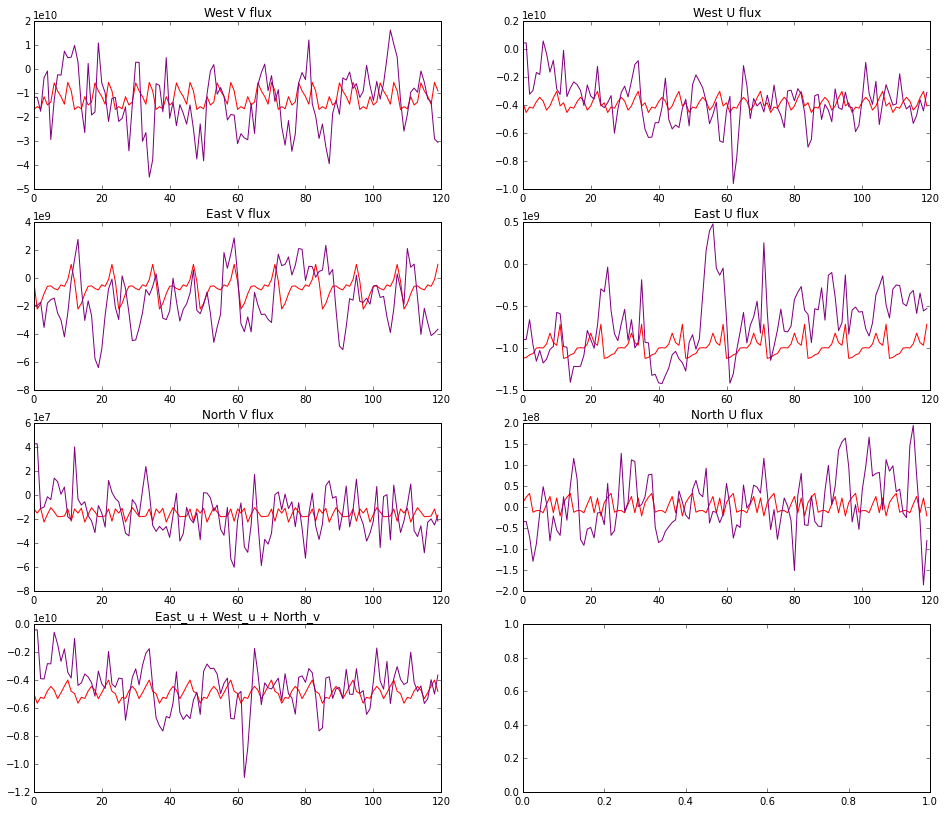

In [52]:
fig, axes = plt.subplots(nrows=4, ncols=2)

#axes[0,0].plot(Wv_flux,'b')
axes[0,0].plot(Wv_flux_ave,'r')
#axes[0,0].plot(Wv_flux_ave_div,'g')
#axes[0,0].plot(Wv_flux_18,'orange')
axes[0,0].plot(Wv_flux_ave_18,'purple')
axes[0,0].set_title('West V flux')

#axes[0,1].plot(Wu_flux,'b')
axes[0,1].plot(Wu_flux_ave,'r')
#axes[0,1].plot(Wu_flux_ave_div,'g')
#axes[0,1].plot(Wu_flux_18,'orange')
axes[0,1].plot(Wu_flux_ave_18,'purple')
axes[0,1].set_title('West U flux')


#axes[1,0].plot(Ev_flux,'b')
axes[1,0].plot(Ev_flux_ave,'r')
#axes[1,0].plot(Ev_flux_ave_div,'g')
#axes[1,0].plot(Ev_flux_18,'orange')
axes[1,0].plot(Ev_flux_ave_18,'purple')
axes[1,0].set_title('East V flux')

#axes[1,1].plot(Eu_flux,'b')
axes[1,1].plot(Eu_flux_ave,'r')
#axes[1,1].plot(Eu_flux_ave_div,'g')
#axes[1,1].plot(Eu_flux_18,'orange')
axes[1,1].plot(Eu_flux_ave_18,'purple')
axes[1,1].set_title('East U flux')

#axes[2,0].plot(Nv_flux,'b')
axes[2,0].plot(Nv_flux_ave,'r')
#axes[2,0].plot(Nv_flux_ave_div,'g')
#axes[2,0].plot(Nv_flux_18,'orange')
axes[2,0].plot(Nv_flux_ave_18,'purple')
axes[2,0].set_title('North V flux')

#axes[2,1].plot(Nu_flux,'b')
axes[2,1].plot(Nu_flux_ave,'r')
#axes[2,1].plot(Nu_flux_ave_div,'g')
#axes[2,1].plot(Nu_flux_18,'orange')
axes[2,1].plot(Nu_flux_ave_18,'purple')
axes[2,1].set_title('North U flux')

#axes[3,0].plot(Wu_flux + Eu_flux + Nv_flux,'b')
axes[3,0].plot(Wu_flux_ave + Eu_flux_ave + Nv_flux_ave,'r')
#axes[3,0].plot(Wu_flux_ave_div + Eu_flux_ave_div + Nv_flux_ave_div,'g')
#axes[3,0].plot(Wu_flux_18 + Eu_flux_18 + Nv_flux_18,'orange')
axes[3,0].plot(Wu_flux_ave_18 + Eu_flux_ave_18 + Nv_flux_ave_18,'purple')
axes[3,0].set_title('East_u + West_u + North_v')

fig.subplots_adjust(right=2.2,top=2.8)